# 1.Importação de Bibliotecas

In [1]:
# Se quiser usar o navegador jupyter notebook é so tirar o código comentado da instalação abaixo

# %pip install pandas
# %pip install seaborn
# %pip install scikit-learn
# %pip install matplotlib

# Data wrangling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sem Avisos futuros
import warnings
warnings.filterwarnings('ignore')

# Preparação para Modelagem Preditiva
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

# Carregar e fazer leitura dos dados dentro do projeto
caminho_do_arquivo = "../desafio-ds-imdb-diel/desafio_indicium_imdb.csv"
df = pd.read_csv(caminho_do_arquivo)


# 2.Entendimento de problema

In [2]:
# Verificar as linhas do data frame para inspeção
print('Visão dos dados:')
df = pd.DataFrame(df)
df

Visão dos dados:


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


## 3.Análise Exploratória dos Dados (EDA)
### Limpeza e pré-processamento dos Dados
* **Objetivo**: Demonstrar as principais características entre as variáveis e apresentar hipóteses relacionadas.
* **Ações**: Você deve incluir visualizações como gráficos de dispersão, histogramas, e boxplots para entender a distribuição dos dados e relações entre variáveis.
* **Ferramentas**: Utilize bibliotecas como `pandas`, `matplotlib`, e `seaborn` para esta parte.

In [3]:
# Descrever os dados para analise e inspeção para limpeza
df.describe(include='all')

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999.000000,999,999,898,999,999,999.000000,999,842.000000,999,999,999,999,999,9.990000e+02,830
unique,NaN,998,100,16,140,202,NaN,999,NaN,548,659,840,890,938,NaN,822
top,NaN,Drishyam,2014,U,130 min,Drama,NaN,An organized crime dynasty's aging patriarch t...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,NaN,2,32,234,23,84,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,500.000000,NaN,NaN,NaN,NaN,NaN,7.947948,NaN,77.969121,NaN,NaN,NaN,NaN,NaN,2.716214e+05,NaN
std,288.530761,NaN,NaN,NaN,NaN,NaN,0.272290,NaN,12.383257,NaN,NaN,NaN,NaN,NaN,3.209126e+05,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,250.500000,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.547150e+04,NaN
50%,500.000000,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.383560e+05,NaN
75%,749.500000,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.731675e+05,NaN


In [4]:
# verificar se existem valores perdidos
data_null = df.isnull().sum().sum()
print("Total de dados faltantes: ", data_null)

Total de dados faltantes:  427


In [5]:
# Verificar todas as colunas
print('As colunas são :\n')
print(df.columns)

As colunas são :

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [6]:
# Remover a coluna 'Unnamed : 0' que não é necessária para análise
df = df.drop(columns=["Unnamed: 0"])

# Converter colunas para tipos de dados apropriado.
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["IMDB_Rating"] = pd.to_numeric(df["IMDB_Rating"], errors="coerce")
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

# Remover caracteres não numéricos e virgulas da coluna 'Gross' e converter para numérico
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)

# Substituir dados faltantes em 'Certificate' por 'Unknown'
df["Certificate"] = df["Certificate"].fillna("Unknown")

# Substituir dados faltantes pela média dos valores disponíveis
df["Meta_score"] = df["Meta_score"].fillna(df["Meta_score"].mean())
df["Gross"] = df["Gross"].fillna(df["Gross"].mean())

# Converter a coluna 'Runtime' para minutos numéricos
df["Runtime"] = df["Runtime"].str.extract('(\d+)').astype(float)

In [7]:
# verificar dados faltantes
missing_values = df.isnull().sum()
missing_values, df.describe(include='all')

(Series_Title     0
 Released_Year    1
 Certificate      0
 Runtime          0
 Genre            0
 IMDB_Rating      0
 Overview         0
 Meta_score       0
 Director         0
 Star1            0
 Star2            0
 Star3            0
 Star4            0
 No_of_Votes      0
 Gross            0
 dtype: int64,
        Series_Title  Released_Year Certificate     Runtime  Genre  \
 count           999     998.000000         999  999.000000    999   
 unique          998            NaN          17         NaN    202   
 top        Drishyam            NaN           U         NaN  Drama   
 freq              2            NaN         234         NaN     84   
 mean            NaN    1991.214429         NaN  122.871872    NaN   
 std             NaN      23.308539         NaN   28.101227    NaN   
 min             NaN    1920.000000         NaN   45.000000    NaN   
 25%             NaN    1976.000000         NaN  103.000000    NaN   
 50%             NaN    1999.000000         NaN  119.00

In [8]:
# Nemhum dados duplicados
df.duplicated().sum()

0

In [9]:
# Verificar as limpezas
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(5), int64(1), object(9)
memory usage: 117.2+ KB


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


### Número de filmes por gêneros.

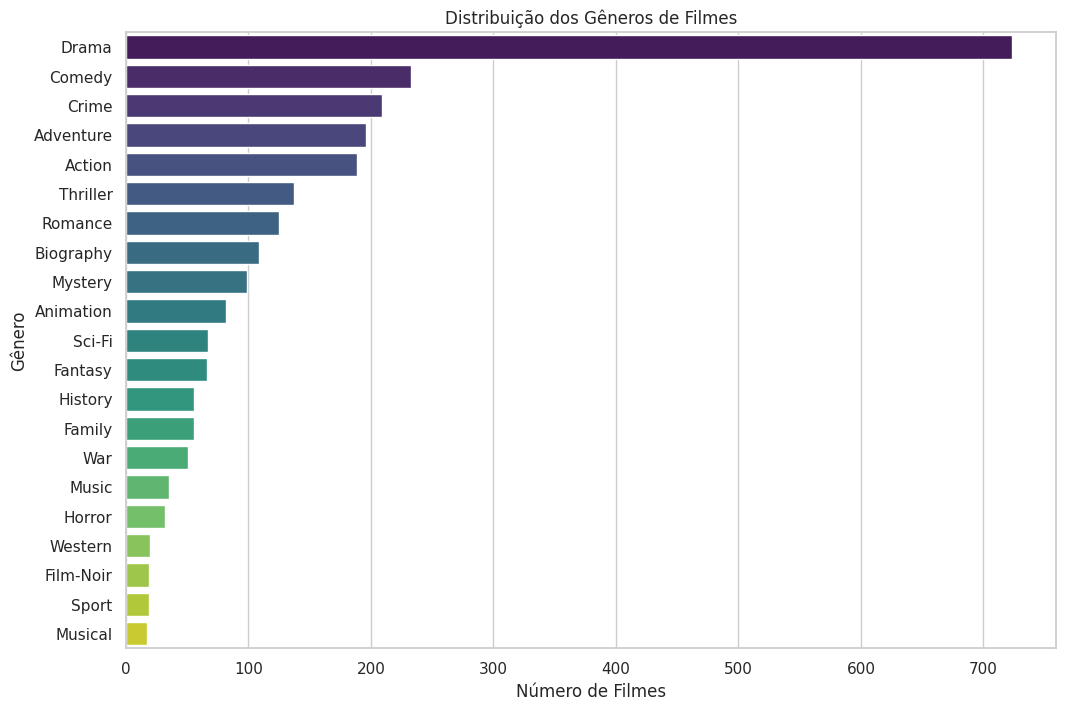

In [10]:
# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")

# Distribuição dos Gêneros
generos = df["Genre"].str.get_dummies(sep=", ")
contagem_generos = generos.sum().sort_values(ascending=False)

# Plotar a distribuição dos gêneros
plt.figure(figsize=(12, 8))
sns.barplot(
    x=contagem_generos.values,
    y=contagem_generos.index,
    hue=contagem_generos.index,
    palette="viridis",
    legend=False,
)
# Títutlo
plt.title("Distribuição dos Gêneros de Filmes")
plt.xlabel("Número de Filmes")
plt.ylabel("Gênero")
plt.show()

Insights do Gráfico de Distribuição de Gêneros de Filmes

O gráfico apresentado acima mostra a distribuição de filmes por gênero, com base em um conjunto de dados não especificado. O eixo horizontal representa o número de filmes, enquanto o eixo vertical representa os diferentes gêneros. Cada barra no gráfico representa o número de filmes pertencentes a um determinado gênero.

Gêneros mais populares

Com base no gráfico, os gêneros mais populares são:

`Drama`: Com o maior número de filmes, o drama é um gênero que explora emoções humanas complexas e temas sérios, geralmente através de histórias ficcionais.

`Comédia`: O segundo gênero mais popular, a comédia busca provocar risadas no público através de situações humorísticas e personagens engraçados.

`Crime`: Aborda histórias de investigação criminal, suspense e justiça. O gênero crime também se caracteriza por cenas de ação, aventura, suspense e lutas, geralmente com foco em heróis e vilões.

### Relação entre Gênero e Faturamento

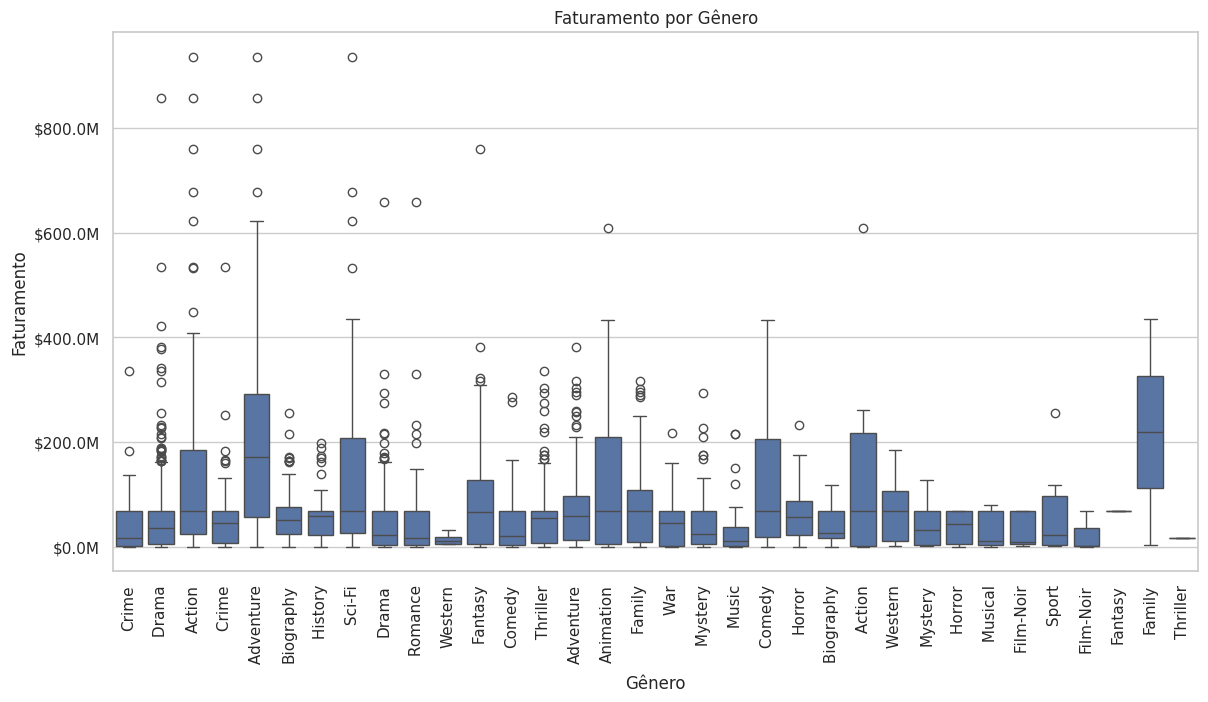

In [11]:
from matplotlib.ticker import FuncFormatter

# Explodir a coluna de gêneros para análise
data_exploded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")

# Função para formatar os valores como dólares
def formatar_dolar(x, pos):
    return '${:.1f}M'.format(x*1e-6)

plt.figure(figsize=(14, 7))
sns.boxplot(data=data_exploded, x='Genre', y='Gross')
plt.title('Faturamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Insights do Gráfico de Faturamento por Gênero

O gráfico apresentado acima mostra a distribuição do faturamento de filmes por gênero, com base em um conjunto de dados não especificado. O eixo horizontal representa o gênero do filme, enquanto o eixo vertical representa o valor total do faturamento em milhões de dólares. Cada barra no gráfico representa o faturamento total de um determinado gênero.

Conclusões e Ações Possíveis:

    Investimento em Gêneros: Se o objetivo for maximizar o faturamento, investir em filmes de Adventure, Animation e Thriller pode ser uma boa estratégia.

### Correlação entre Duração do Filme e Faturamento

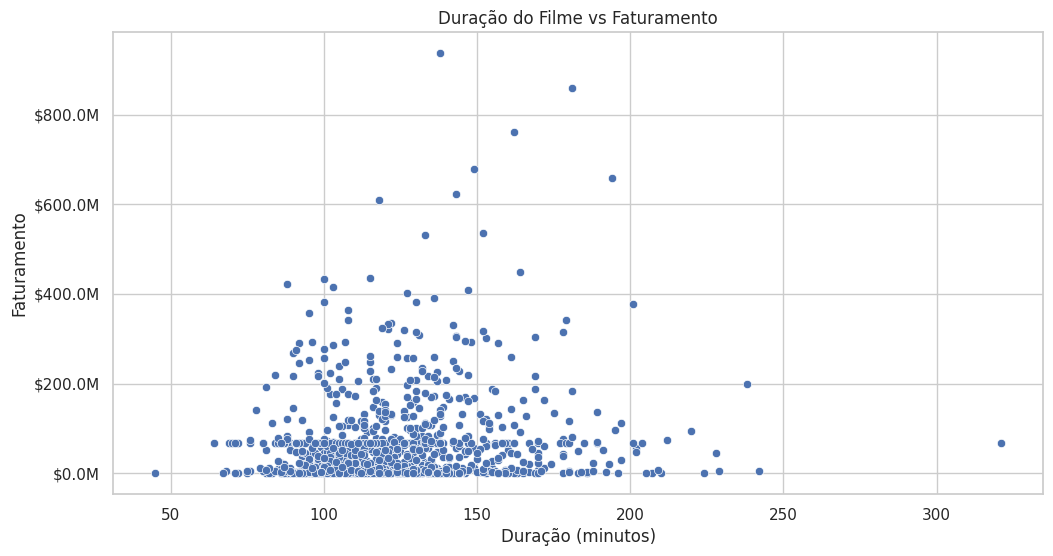

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Runtime', y='Gross')
plt.title('Duração do Filme vs Faturamento')
plt.xlabel('Duração (minutos)')
plt.ylabel('Faturamento')

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Insights do gráfico Duração do Filme vs Faturamento

A maioria dos filmes está concentrada na faixa de 80 a 150 minutos de duração.
Os filmes que faturam mais de $400 milhões tendem a estar nesta mesma faixa de duração.
Há poucos filmes com duração superior a 200 minutos, e esses filmes não mostram um padrão claro de faturamento.

Conclusões e Ações Possíveis:

`Planejamento de Duração`: Para produtores e cineastas, focar em filmes com duração entre 100 e 150 minutos pode ser uma estratégia segura para maximizar as chances de sucesso financeiro.

`Flexibilidade de Duração`: Embora a faixa de 100 a 150 minutos seja popular, filmes fora desta faixa ainda têm potencial de sucesso. Isso sugere que o conteúdo e a qualidade do filme podem ser mais importantes que a duração por si só.

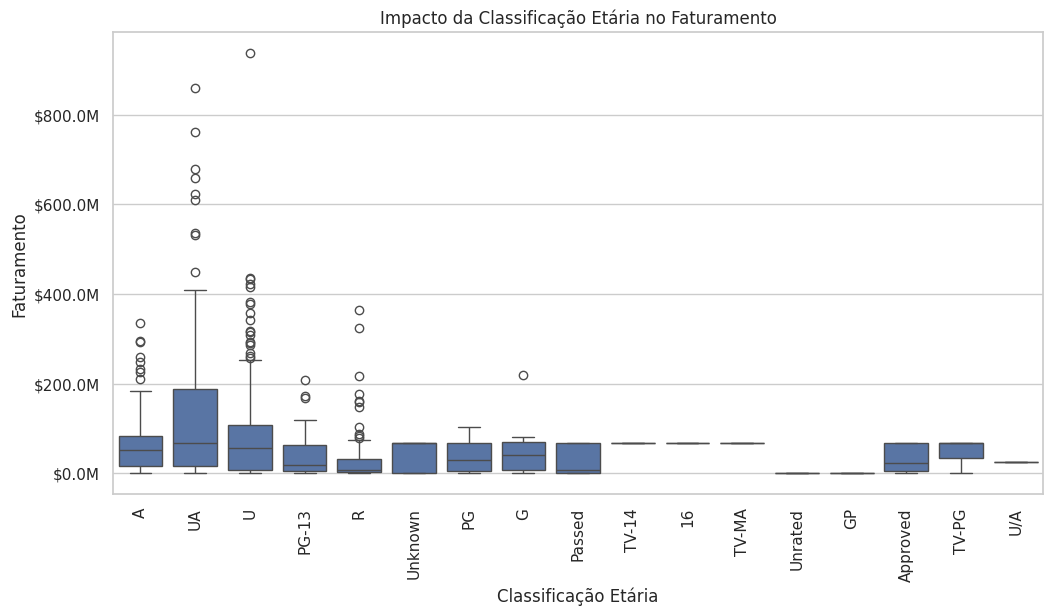

In [13]:
# Impacto da Classificação Etária no Faturamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Certificate', y='Gross')
plt.title('Impacto da Classificação Etária no Faturamento')
plt.xlabel('Classificação Etária')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)
# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Insights do Gráfico Impacto da Classificação Etária no Faturamento

`U/A (Acompanhamento de Adulto)` e `U (Universal)` apresentam uma ampla variação no faturamento, indicando que filmes com essas classificações podem ser grandes sucessos ou fracassos, mas geralmente tendem a ter um bom desempenho.

`PG-13 (Acompanhamento de Adulto Sugerido para Menores de 13 Anos)` tem uma variação moderada, mas com muitos outliers, sugerindo que filmes com essa classificação podem alcançar faturamentos muito altos.

`R (Restrito)` e `PG (Acompanhamento de Adulto Sugerido)` mostram uma variação menor, com poucos outliers.

Conclusões e Ações Possíveis:

`Foco em Classificações Populares`: Para maximizar o potencial de faturamento, filmes com classificações U/A, U, e PG-13 parecem ser boas apostas, dado o alto faturamento médio e a presença de muitos outliers de sucesso.

`Análise de Riscos`: Filmes com classificação R e PG devem ser abordados com cautela, pois tendem a ter menos variação e outliers de alto faturamento.

`Consideração de Classificações Menos Comuns`: Filmes com classificações como Unknown, Passed, GP, e Unrated podem não ser uma boa aposta se o objetivo for alto faturamento, dado seu desempenho financeiro mais fraco.

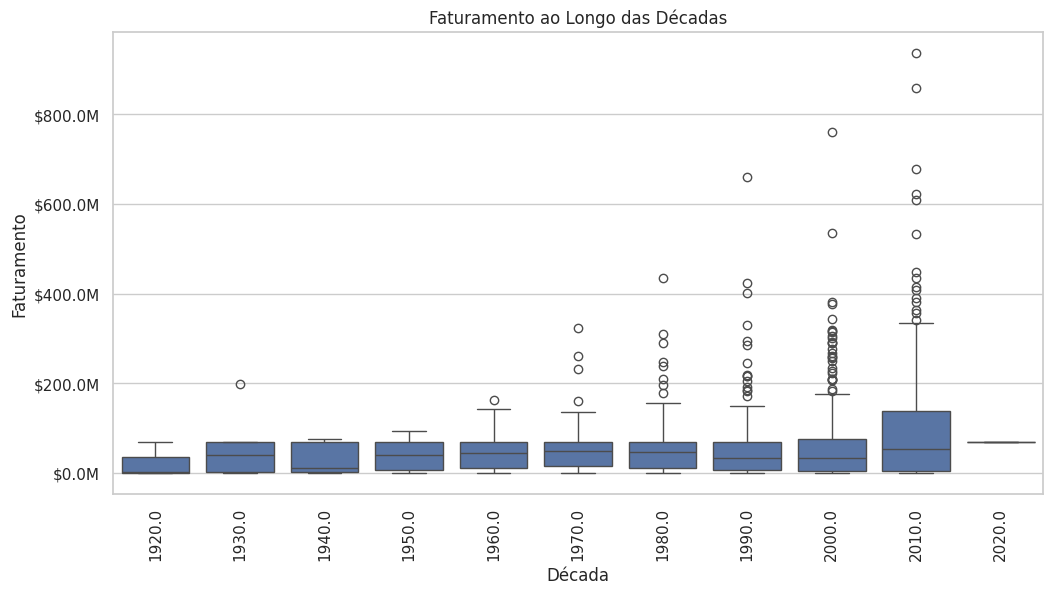

In [14]:
# Comparação de Faturamento ao Longo das Décadas
df['Decade'] = (df['Released_Year'] // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Decade', y='Gross')
plt.title('Faturamento ao Longo das Décadas')
plt.xlabel('Década')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)
# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


Insights do Gráfico Faturamento ao Longo das Décadas

Há uma tendência clara de aumento no faturamento ao longo das décadas. A partir da década de 1970, há um aumento gradativo tanto na mediana quanto na variação do faturamento, culminando em um aumento significativo nas últimas duas décadas.

Conclusões e Ações Possíveis:

`Investimento em Filmes Modernos`: Focar em filmes produzidos nas décadas mais recentes (2000 e 2010) pode ser uma boa estratégia, dado o maior potencial de faturamento.

`Análise de Mercado`: A maior variação e o aumento nos outliers nas últimas décadas sugerem que o mercado se tornou mais competitivo, e filmes bem-sucedidos podem atingir faturamentos muito altos.

`Histórico de Sucesso`: Filmes das décadas de 1990, 2000 e 2010 devem ser estudados para entender os fatores que contribuíram para o alto faturamento, como marketing, franquias populares e avanços tecnológicos.

### Relação entre Ano de Lançamento e Classificação IMDB

<function matplotlib.pyplot.show(close=None, block=None)>

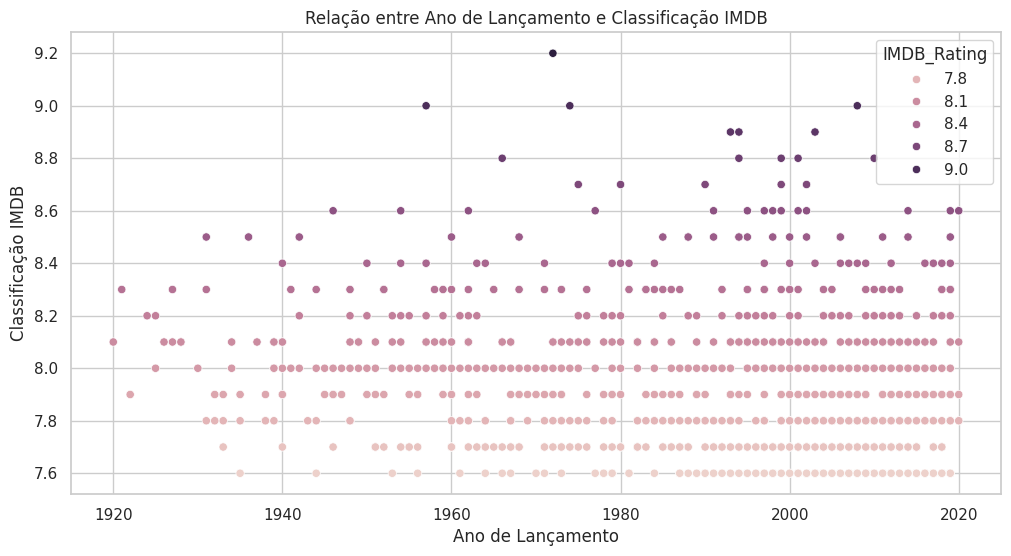

In [15]:
# Gráficos de dispersão entre Released Year vs IMDB Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Released_Year", y="IMDB_Rating", hue='IMDB_Rating')
plt.title("Relação entre Ano de Lançamento e Classificação IMDB")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Classificação IMDB")
plt.show

Insights do Gráfico Relação entre Ano de Lançamento e Classificação IMDB

`Classificações Mais Altas`: Filmes das décadas de 1970, 1980 e 1990 têm algumas das classificações mais altas (próximas de 9.0), indicando que alguns dos filmes mais bem avaliados foram produzidos nesses períodos.

`Consistência de Qualidade`: Filmes bem avaliados (acima de 8.0) aparecem consistentemente em todas as décadas, sugerindo que a qualidade cinematográfica pode ser encontrada ao longo de toda a história do cinema.

### Gêneros de Filmes e Classificação IMDB

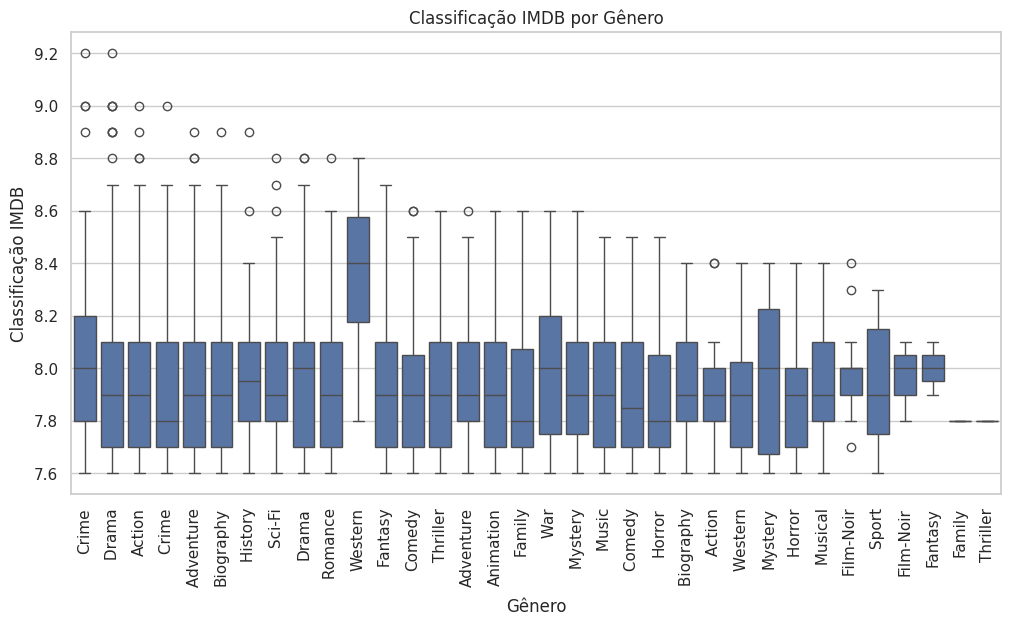

In [16]:
# Método Explode no Pandas
# Explodindo a coluna Genre para a visualização boxplot
data_exploded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")

# Boxplot of Genre vs IMDB Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_exploded, x="Genre", y="IMDB_Rating")
plt.title("Classificação IMDB por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Classificação IMDB")
plt.xticks(rotation=90)
plt.show()

Insights do Gráfico Classificação IMDB por Gênero

`Foco em Gêneros Bem Avaliados`: Para produtores e cineastas, investir em gêneros como Crime, Drama, Action, History, e Biography pode ser uma boa estratégia para obter boas avaliações.

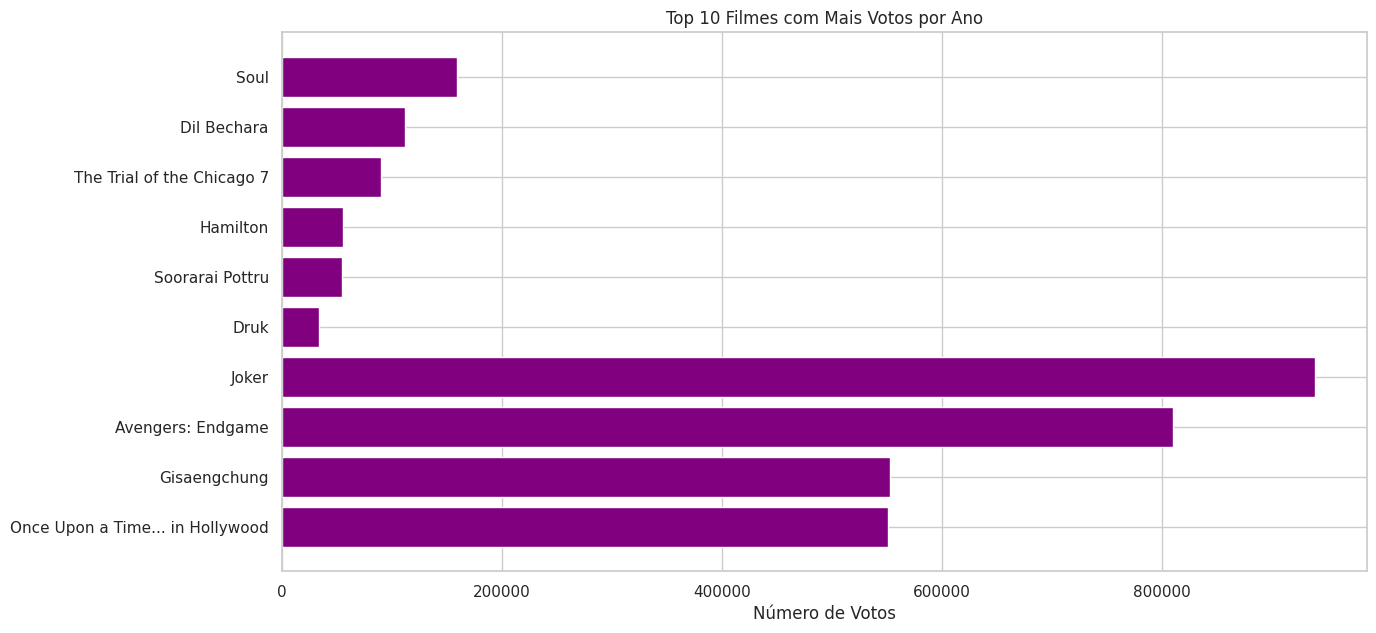

In [18]:
# Mostrar os 10 melhores filmes avaliados por votos

data = df.sort_values(by="Released_Year", ascending=False)
melhores_filmes_avaliados = pd.DataFrame(columns=data.columns)

for year in data["Released_Year"].unique():
    if year not in [2025, 2024, 2023]: # Ajuste de anos futuros
        df_year = data[data["Released_Year"] == year]
        if not df_year.empty:
            df_year_sorted = df_year.sort_values(by="No_of_Votes", ascending=False)
            melhores_filmes_avaliado = df_year_sorted.iloc[:10] # Seleciona os 10 melhores
            melhores_filmes_avaliados = pd.concat(
                [melhores_filmes_avaliados, melhores_filmes_avaliado],
                ignore_index=True,
            )

# Visualização dos 10 melhores filmes avaliados por votos
top_10_filmes = melhores_filmes_avaliados.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_10_filmes['Series_Title'], top_10_filmes['No_of_Votes'], color='purple')
plt.xlabel('Número de Votos')
plt.title('Top 10 Filmes com Mais Votos por Ano')
plt.gca().invert_yaxis() # Inverter o eixo y para mostrar o filme com mais votos no topo
plt.show()


Insights do Gráfico Top 10 Filmes com Mais Votos por Ano

Joker é claramente o filme com o maior número de votos, seguido por Avengers: Endgame e Once Upon a Time... in Hollywood. Analisar o que contribuiu para o sucesso de filmes como esses pode fornecer insights valiosos para futuras produções cinematográficas.

Considerar uma variedade de gêneros pode ser benéfico, dado que filmes de diferentes tipos aparecem na lista dos mais votados.

`Engajamento do Público`: Filmes que geram discussões significativas e impacto cultural tendem a receber mais votos. Estratégias de marketing e engajamento que promovem essas discussões podem aumentar a visibilidade e o sucesso de um filme.

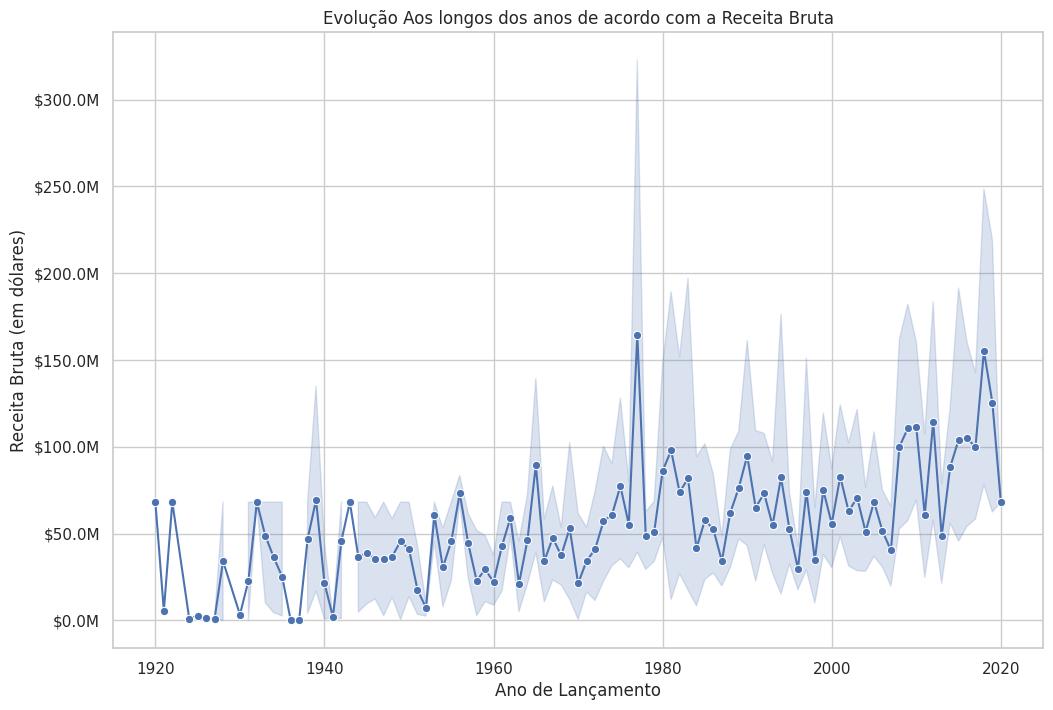

In [19]:
# Análise Temporal de Bilheteria ao longo dos anos
from matplotlib.ticker import FuncFormatter
# Função para formatar os valores como dólares
def formatar_dolar(x, pos):
    return '${:.1f}M'.format(x*1e-6)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="Released_Year", y="Gross", marker="o")
plt.title("Evolução Aos longos dos anos de acordo com a Receita Bruta")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Receita Bruta (em dólares)")

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Insights do Gráfico Evolução Aos Longos dos anos de acordo com a Receita Bruta

Desde aproximadamente 1980, há um aumento mais notável na receita bruta, com picos mais altos e uma variação maior.

A partir de 1970, as flutuações se tornam mais pronunciadas, indicando anos com filmes de receitas excepcionalmente altas.

Existem vários picos significativos ao longo do gráfico, com o mais alto próximo de $300 milhões. Esses picos podem estar associados ao lançamento de filmes blockbuster(Maiores Bilheterias) ou altamente esperados que geraram receitas substancialmente maiores do que a média.

Conclusões e Ações Possíveis:

`Análise de Picos`: Investigar os filmes lançados nos anos que mostram picos significativos pode fornecer insights sobre fatores de sucesso, como estratégias de marketing, franquias populares, ou avanços tecnológicos que atraíram grandes audiências.

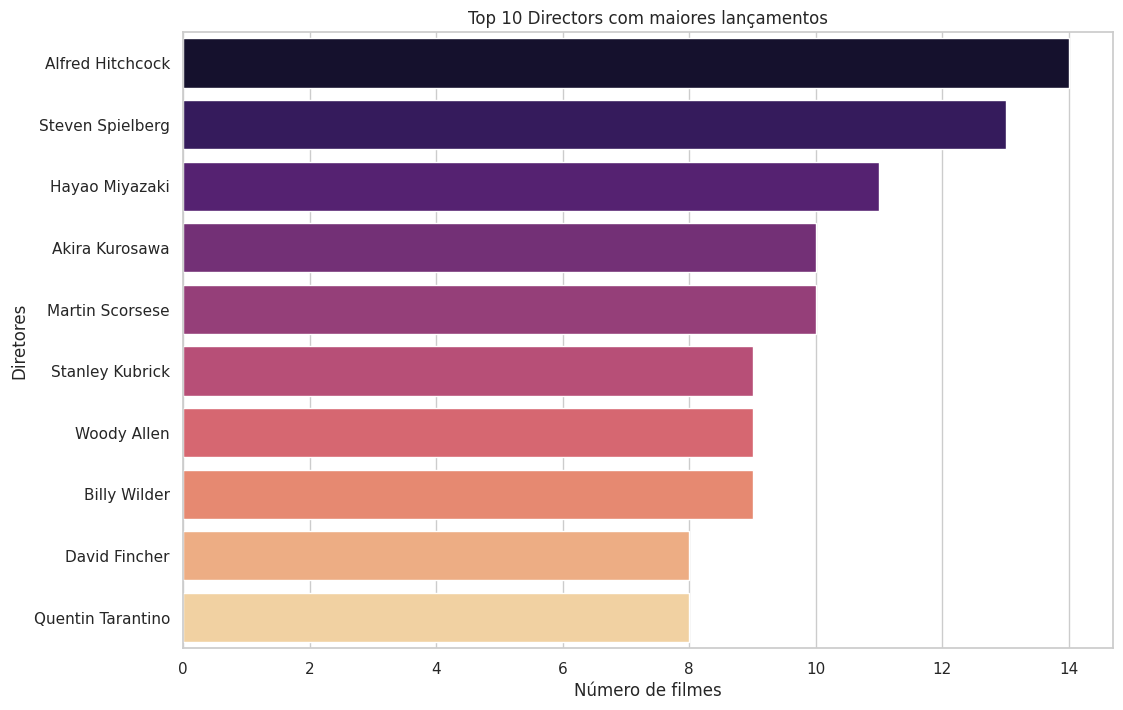

In [20]:
# Obtenha os diretores com os maiores números de lançamentos
contagem_diretor = df["Director"].value_counts().sort_values(ascending=False)
contagem_diretor_df = contagem_diretor.to_frame().reset_index()
contagem_diretor_df.columns = ["Director", "count"]

# Plotar os dados
plt.figure(figsize=(12, 8))
sns.barplot(
    x="count",
    y="Director",
    hue="Director",
    data=contagem_diretor_df.head(10),
    palette="magma",
)
plt.title("Top 10 Diretores com maiores lançamentos")
plt.xlabel("Número de filmes")
plt.ylabel("Diretores")
plt.show()

Insights do Gráfico Top 10 Diretores com Maiores lançamentos

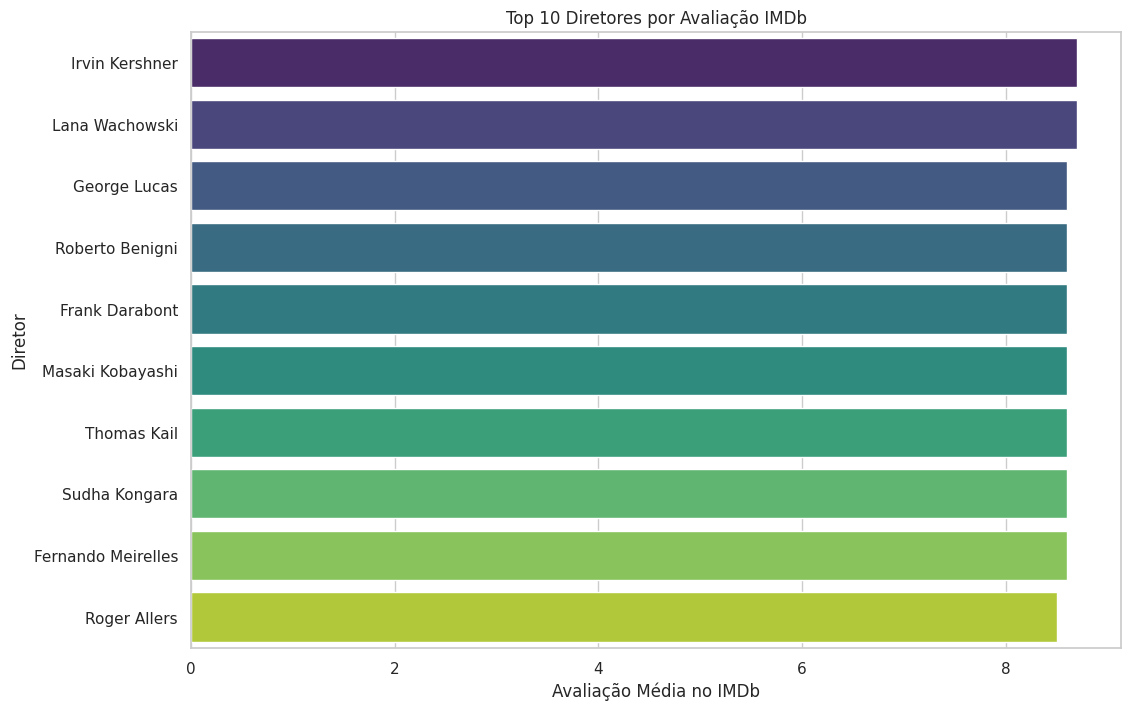

In [21]:
# Análise de Diretores e Atores
# Top 10 Diretores por Avaliação IMDb
top_diretores = (
    df.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
)

# Plotar os top 10 diretores
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_diretores.values,
    y=top_diretores.index,
    hue=top_diretores.index,
    palette="viridis",
)
plt.title("Top 10 Diretores por Avaliação IMDb")
plt.xlabel("Avaliação Média no IMDb")
plt.ylabel("Diretor")
plt.show()

# 4. Modelagem Preditiva
* Modelo Utilizado: `Regressão Linear` para prever a nota do IMDB.
* Tipo de Problema: Regressão.
* Avaliação do Modelo: `Mean Squared Error (MSE)` e `R-squared (R²)`.

### Palavras-chave na Coluna Overview

In [22]:
# Pré-processamento de texto
df["Overview"] = df["Overview"].str.lower()

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["Overview"])

# Transformar acoluna Genre para multi-label binária
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df["Genre"].str.split(","))

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar o modelo
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Previsão e Avaliação
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

              precision    recall  f1-score   support

      Action       0.00      0.00      0.00         3
   Adventure       0.00      0.00      0.00        25
   Biography       0.00      0.00      0.00         7
      Comedy       0.00      0.00      0.00        18
       Crime       0.00      0.00      0.00        20
       Drama       0.62      0.11      0.18        95
      Family       0.00      0.00      0.00         5
     Fantasy       0.00      0.00      0.00         9
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00         8
      Horror       0.00      0.00      0.00         7
       Music       0.00      0.00      0.00         9
     Musical       0.00      0.00      0.00         4
     Mystery       0.00      0.00      0.00        21
     Romance       0.00      0.00      0.00        21
      Sci-Fi       0.00      0.00      0.00        11
       Sport       0.00      0.00      0.00         3
    Thriller       0.00    

# 5.Previsão da Nota do IMDb para um Filme Específico
* **Ação**: Utilizar o modelo treinado para prever a nota do IMDB de um filme com as características fornecidas.
* **Ferramentas**: `pandas` para preparar os dados de entrada, `sklearn` para aplicar o modelo treinado.

In [23]:
# Preparar os dados do dataset original e preparar os features
features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
X = df[features]
y = df['IMDB_Rating']

# Lidar com dados faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir o dataset para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever e avaliar para testar a qualidade do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Características do filme
filme = {
    "Series_Title": "The Shawshank Redemption",
    "Released_Year": 1994,
    "Certificate": "A",
    "Runtime": 142,
    "Genre": "Drama",
    "Meta_score": 80.0,
    "Director": "Frank Darabont",
    "Star1": "Tim Robbins",
    "Star2": "Morgan Freeman",
    "Star3": "Bob Gunton",
    "Star4": "William Sadler",
    "No_of_Votes": 2343110,
    "Gross": 28341469,
}

# Selecionar as mesmas features utilizadas no modelo
filme_features = [[
    filme['Released_Year'],
    filme['Runtime'],
    filme['Meta_score'],
    filme['No_of_Votes'],
    filme['Gross']
]]

# Utilizar o mesmo imputador para garantir consistência
filme_imputador = imputer.transform(filme_features)

# Fazer a previsão com o modelo treinado
filme_rating = model.predict(filme_imputador)
arredondar_rating = round(filme_rating[0], 2)
print(f'Nota Previsão do IMDB: {arredondar_rating}')

Mean Squared Error: 0.048721610810954184
R-squared: 0.25779034167701287
Nota Previsão do IMDB: 9.17


In [24]:
import joblib
# Salvar o modelo em formato .pkl
joblib.dump(model, 'modelo_imdb.pkl')

['modelo_imdb.pkl']